# Basics of linear regression

### Introduction
- Regression is to do with "relationship between variables".
- For example, is humidity ($H$) is related with the temperature ($T$) in this room?   
- Assume we do experiments, and from the data, we propose a linear hypothesis : $H\propto T$.
- Ofcourse there can be other possible models that can be considered such as approximating by a Fourier series, or by higher degree polynomial and so on.
- Regression also determine "strength" or "significance" of relationship.
- Regression vs. Curve Fitting.


### Steps

- Propose a regression model (assumptions).
- Interpret how "significant" is the regression model. Define a quantitative criteria.
- Check the assumptions, and go to step one.

Thus linear regression analysis also introduces us to framework of hypothesis testing.

### Terminology

- "Input" or "independent" variable or "stimulus" $(T)$.
- "Dependent" or "response" variable $(H)$. 
- "Positive" and "negative" relationship.
- Regression-line/plane.
- Residual ($H=mT+c\pm\epsilon$). (In general "independent" variables can be more than one).

### Exercise

- ... data set.

In [748]:
import numpy as np

N=100
x=np.linspace(0,1,N)
#print(x)

In [749]:
y=-(np.random.rand(N)+0.5)*x + 2.0
#print(y)

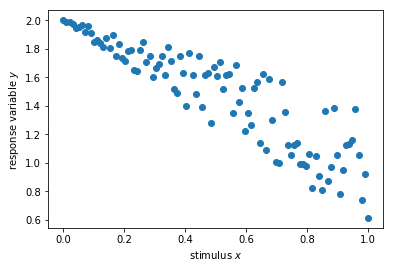

In [750]:
import matplotlib.pyplot as plt

def myplot(x,y,style): 
    plt.plot(x,y,style);
    plt.xlabel('stimulus $x$'); 
    plt.ylabel('response variable $y$');
        
myplot(x,y,'o')

In [751]:
m=1.5
c=2.0
Y1=m*x+c
Y2=0.6*x+c
Y3=0.1*x+c

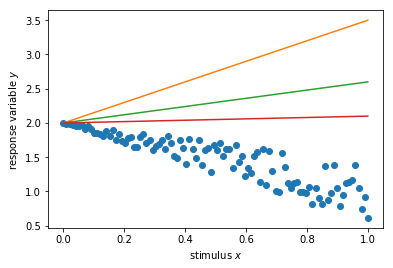

In [752]:
myplot(x,y,'o'); 
myplot(x,Y1,'-'); 
myplot(x,Y2,'-'); 
myplot(x,Y3,'-'); 

### Spread

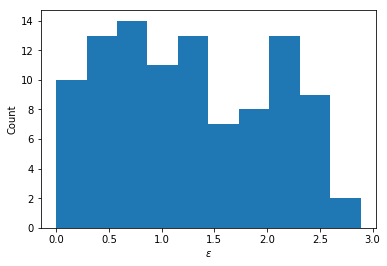

In [753]:
d=Y1-y

def myhist(var,xlabel,ylabel):
    plt.hist(d)
    plt.xlabel(xlabel); 
    plt.ylabel(ylabel)

myhisto(d,'$\epsilon$', 'Count')

## First of all, some standard steps on the data

- Centering
- Normalization

- obtain $\bar{x},\bar{y}$

$\bar{x} = \frac{1}{N}\sum_i{x_i}$

$\bar{y} = \frac{1}{N}\sum_i{y_i}$

In [754]:
x_mean = sum(x)/len(x);
y_mean = sum(y)/len(y);

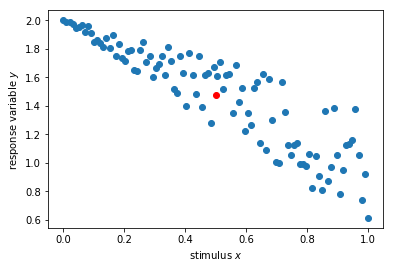

In [755]:
myplot(x,y,'o'); 
myplot(x_mean,y_mean,'or');

## Centering

$x_i = x_i-\bar{x}$

$y_i = y_i-\bar{y}$

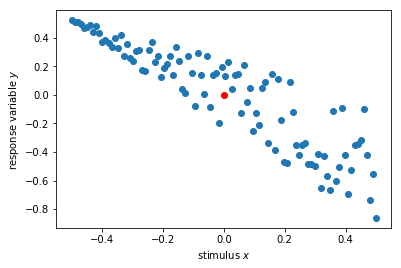

In [756]:
x=x-x_mean;
y=y-y_mean;

x_mean = sum(x)/len(x);
y_mean = sum(y)/len(y);

myplot(x,y,'o'); 
myplot(x_mean,y_mean,'or');

## Normalization/rescaling

This is done to have SD = 1, and mean = 0.

$x_i = \frac{x_i}{SD}$

$y_i = \frac{y_i}{SD}$

1.0
1.0


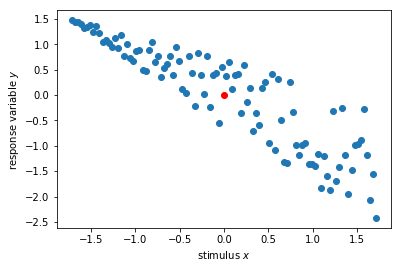

In [757]:
x=x/np.std(x);
y=y/np.std(y);
myplot(x,y,'o'); 
myplot(x_mean,y_mean,'or');

print(np.std(x))
print(np.std(y))


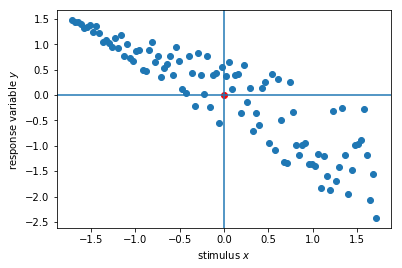

In [758]:
myplot(x,y,'o'); 
myplot(x_mean,y_mean,'or'); 
plt.axvline(x_mean); 
plt.axhline(y_mean);

## Least-square

$
m=\frac{ \sum\limits_{i=1}^{N} (x_i-\bar{x})(y_i-\bar{y}) }
     { \sum\limits_{i=1}^{N} (x_i-\bar{x})^2 }
$, $c=\bar{y}-m\bar{x}$

In [759]:
a = sum( (x-x_mean)*(y-y_mean) )
b = sum( (x-x_mean)**2 )
m = a/b
print(m)

-0.90107585759


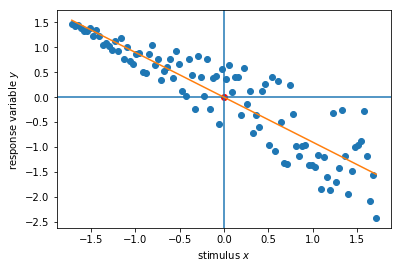

In [760]:
c=0
Y=m*x+c

myplot(x,y,'o'); 
myplot(x_mean,y_mean,'or'); 
plt.axvline(x_mean); 
plt.axhline(y_mean);
myplot(x,Y,'-'); 

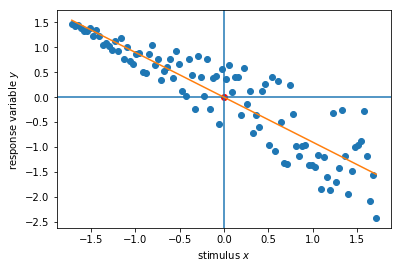

In [761]:
c=y_mean - m*x_mean;

Y=m*x+c

myplot(x,y,'o'); 
myplot(x_mean,y_mean,'or'); 
plt.axvline(x_mean); 
plt.axhline(y_mean);
myplot(x,Y,'-'); 

## Nature of residual

-9.92539384015e-16
0.433661502635


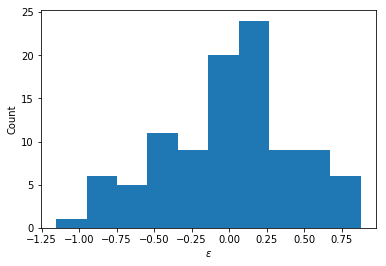

In [762]:
d=Y-y;

myhist(d,'$\epsilon$','Count');

print(np.mean(d))
print(np.std(d))

## Assesing the "strength" of regression model

## $R^2$ approach

$R^2$ is the ratio of the "sum of squares" of the estimated and the actual responses.

if $y_i$ are the actual "outcomes"
and $Y_i$ are the estimated "outcomes"
then
$
R^2 = \frac{\sum(Y_i-\bar{y})^2} {\sum(y_i-\bar{y})^2} = \frac{\text{Regression sum of squares}}{\text{Total/actual sum of squares}}
$

If $R^2\rightarrow 1$, implies strong relationship.

If $R^2\rightarrow 0$, implies weak relationship.


In [763]:
num = sum( (Y - y_mean)**2 );
den = sum( (y - y_mean)**2 );
R2  = num/den;
print(R2)

0.811937701132


## Standard error of estimate

$\epsilon = \sqrt{\frac{1}{N-2}\sum(Y_i-{y_i})^2}$

$\sum{(Y_i-{y_i})^2}$ is called the $\textbf{residual sum of squares}$.

In [764]:
err = np.sqrt( np.sum( (Y - y)**2 )/(N-2));
print(err)

0.438064270361
